In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout 
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam

from sklearn.metrics import classification_report,confusion_matrix

import tensorflow as tf

import cv2
import os

import numpy as np

labels = ['rugby', 'soccer']
img_size = 224
def get_data(data_dir):
    data = [] 
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img))[...,::-1] #convert BGR to RGB format
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

In [2]:
orig_path = 'E:\SketchClassifier\quickdraw'
print(len(next(os.walk(orig_path))[1]))

345


In [28]:
labels = os.listdir(orig_path)
labels_int = list(range(len(labels)))
#print(labels_int)

In [4]:
x_data = []  #input images
y_data = []  #output classes

In [5]:
for i in range(5):
    k = 0
    for file in os.listdir(os.path.join(orig_path,str(labels[i]))):
        k = k +1
        #print(k, labels[i])
        image = cv2.imread(str(os.path.join(orig_path,str(labels[i]),file)))
        image = cv2.resize(image, (100,100))
        x_data.append(image)
        y_data.append(labels_int[i])

In [6]:
print(np.array(x_data).shape)

(2500, 100, 100, 3)


0
(100, 100, 3)


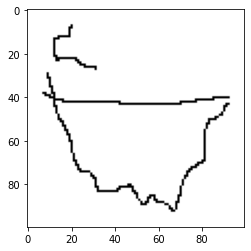

In [7]:
plt.imshow(x_data[0])
print(y_data[0])
print(x_data[0].shape)

In [8]:
 from sklearn.model_selection import train_test_split

In [9]:
x_train, x_test, y_train, y_test = train_test_split(np.array(x_data), np.array(y_data), test_size = 0.2, random_state=2)

In [10]:
print(x_train.shape, x_test.shape, sep=', ')
print(y_train.shape, y_test.shape, sep=', ')

(2000, 100, 100, 3), (500, 100, 100, 3)
(2000,), (500,)


In [11]:
from tensorflow.keras.utils import to_categorical

In [12]:
y_test_cat = to_categorical(y_test, 5)
y_train_cat = to_categorical(y_train, 5)

In [13]:
#normalise data
x_train = x_train/x_train.max()
x_test = x_test/x_test.max()

In [14]:
#import model
import tensorflow as tf
from tensorflow.keras.applications import InceptionV3

inception_orig = InceptionV3(weights='imagenet')

inception_orig.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 149, 149, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 149, 149, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 149, 149, 32) 0           batch_normalization[0][0]        
_______________________________________________________________________________________

In [15]:
#remove fully-connected layers at the top of the CNN

inc_model = tf.keras.applications.inception_v3.InceptionV3(weights='imagenet', include_top=False, input_shape=(100,100,3))

inc_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 100, 100, 3) 0                                            
__________________________________________________________________________________________________
conv2d_94 (Conv2D)              (None, 49, 49, 32)   864         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_94 (BatchNo (None, 49, 49, 32)   96          conv2d_94[0][0]                  
__________________________________________________________________________________________________
activation_94 (Activation)      (None, 49, 49, 32)   0           batch_normalization_94[0][0]     
_______________________________________________________________________________________

In [16]:
#ensure all the layers are trainable
for (i, layer) in enumerate(inc_model.layers):
    print(str(i)+" "+layer.__class__.__name__, layer.trainable)

0 InputLayer True
1 Conv2D True
2 BatchNormalization True
3 Activation True
4 Conv2D True
5 BatchNormalization True
6 Activation True
7 Conv2D True
8 BatchNormalization True
9 Activation True
10 MaxPooling2D True
11 Conv2D True
12 BatchNormalization True
13 Activation True
14 Conv2D True
15 BatchNormalization True
16 Activation True
17 MaxPooling2D True
18 Conv2D True
19 BatchNormalization True
20 Activation True
21 Conv2D True
22 Conv2D True
23 BatchNormalization True
24 BatchNormalization True
25 Activation True
26 Activation True
27 AveragePooling2D True
28 Conv2D True
29 Conv2D True
30 Conv2D True
31 Conv2D True
32 BatchNormalization True
33 BatchNormalization True
34 BatchNormalization True
35 BatchNormalization True
36 Activation True
37 Activation True
38 Activation True
39 Activation True
40 Concatenate True
41 Conv2D True
42 BatchNormalization True
43 Activation True
44 Conv2D True
45 Conv2D True
46 BatchNormalization True
47 BatchNormalization True
48 Activation True
49 Activ

In [17]:
#freeze the trainable layers
for layer in inc_model.layers:
    layer.trainable = False

for (i, layer) in enumerate(inc_model.layers):
    print(str(i)+" "+layer.__class__.__name__, layer.trainable)

0 InputLayer False
1 Conv2D False
2 BatchNormalization False
3 Activation False
4 Conv2D False
5 BatchNormalization False
6 Activation False
7 Conv2D False
8 BatchNormalization False
9 Activation False
10 MaxPooling2D False
11 Conv2D False
12 BatchNormalization False
13 Activation False
14 Conv2D False
15 BatchNormalization False
16 Activation False
17 MaxPooling2D False
18 Conv2D False
19 BatchNormalization False
20 Activation False
21 Conv2D False
22 Conv2D False
23 BatchNormalization False
24 BatchNormalization False
25 Activation False
26 Activation False
27 AveragePooling2D False
28 Conv2D False
29 Conv2D False
30 Conv2D False
31 Conv2D False
32 BatchNormalization False
33 BatchNormalization False
34 BatchNormalization False
35 BatchNormalization False
36 Activation False
37 Activation False
38 Activation False
39 Activation False
40 Concatenate False
41 Conv2D False
42 BatchNormalization False
43 Activation False
44 Conv2D False
45 Conv2D False
46 BatchNormalization False
47 Batc

In [18]:
#function to create a fully-connected head for the CNN
def CNNHead(bottom, num_classes):
    top = bottom.output
    top = Flatten(name='flatten')(top) #add flatten layer to top
    top = Dense(256, activation='relu')(top)
    top = Dropout(0.3)(top)
    top = Dense(num_classes, activation='softmax')(top)
    return top

In [19]:
#add the fully-connected head on top of the VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten

FCHead = CNNHead(inc_model, 5)

model = Model(inputs=inc_model.input, outputs=FCHead)

model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 100, 100, 3) 0                                            
__________________________________________________________________________________________________
conv2d_94 (Conv2D)              (None, 49, 49, 32)   864         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_94 (BatchNo (None, 49, 49, 32)   96          conv2d_94[0][0]                  
__________________________________________________________________________________________________
activation_94 (Activation)      (None, 49, 49, 32)   0           batch_normalization_94[0][0]     
_______________________________________________________________________________________

In [20]:
#re-check that only the last four layers are trainable
for (i, layer) in enumerate(model.layers):
    print(str(i)+" "+layer.__class__.__name__, layer.trainable)

0 InputLayer False
1 Conv2D False
2 BatchNormalization False
3 Activation False
4 Conv2D False
5 BatchNormalization False
6 Activation False
7 Conv2D False
8 BatchNormalization False
9 Activation False
10 MaxPooling2D False
11 Conv2D False
12 BatchNormalization False
13 Activation False
14 Conv2D False
15 BatchNormalization False
16 Activation False
17 MaxPooling2D False
18 Conv2D False
19 BatchNormalization False
20 Activation False
21 Conv2D False
22 Conv2D False
23 BatchNormalization False
24 BatchNormalization False
25 Activation False
26 Activation False
27 AveragePooling2D False
28 Conv2D False
29 Conv2D False
30 Conv2D False
31 Conv2D False
32 BatchNormalization False
33 BatchNormalization False
34 BatchNormalization False
35 BatchNormalization False
36 Activation False
37 Activation False
38 Activation False
39 Activation False
40 Concatenate False
41 Conv2D False
42 BatchNormalization False
43 Activation False
44 Conv2D False
45 Conv2D False
46 BatchNormalization False
47 Batc

In [21]:
from tensorflow.keras.callbacks import EarlyStopping
earlystop =  EarlyStopping(monitor = 'val_loss',
                          min_delta=0.005,
                          patience=1,
                          verbose=1,
                          restore_best_weights=True)

#callbacks = [earlystop]

In [22]:
from tensorflow.keras.callbacks import ModelCheckpoint
checkpoint = ModelCheckpoint('IncV3_checkpoint_08Mar.h5',
                            monitor='val_accuracy',
                            mode='max',
                            save_best_only=True,
                            verbose=1) #verbose = 1 to get messages during training

callbacks = [checkpoint]

In [23]:
import math
from tensorflow.keras.callbacks import LearningRateScheduler

def step_decay(epoch):
    init_lr = 0.05
    drop_lr = 0.05
    epochs_drop = 4
    lr = init_lr*math.pow(drop_lr, math.floor((1+epoch)/epochs_drop))
    return lr

lr_stepdecay = LearningRateScheduler(step_decay, verbose=1)

callbacks = [checkpoint, lr_stepdecay]

print(step_decay(0))

0.05


In [24]:
#x_train = x_train.reshape(2000, 100, 100, 1) #60k images, 28x28 pixels and 1 to add an extra dimension
#x_test = x_test.reshape(500, 100, 100, 1)

#print(x_train[0].shape, x_test[0].shape)

In [25]:
#train the top layers of the model

model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])


history = model.fit(x=x_train, y=y_train_cat,
                    epochs=20,
                    callbacks=callbacks,
                    validation_data=(x_test,y_test_cat),
                    batch_size=10)

model.save('quickdraw10_IncV3_08Mar.h5')


Epoch 00001: LearningRateScheduler reducing learning rate to 0.05.
Epoch 1/20
200/200 [==============================] - ETA: 0s - loss: 1.3367 - accuracy: 0.5045
Epoch 00001: val_accuracy improved from -inf to 0.72800, saving model to IncV3_checkpoint_08Mar.h5
200/200 [==============================] - 26s 131ms/step - loss: 1.3367 - accuracy: 0.5045 - val_loss: 0.8212 - val_accuracy: 0.7280

Epoch 00002: LearningRateScheduler reducing learning rate to 0.05.
Epoch 2/20
200/200 [==============================] - ETA: 0s - loss: 0.9394 - accuracy: 0.6470
Epoch 00002: val_accuracy improved from 0.72800 to 0.76400, saving model to IncV3_checkpoint_08Mar.h5
200/200 [==============================] - 22s 109ms/step - loss: 0.9394 - accuracy: 0.6470 - val_loss: 0.6991 - val_accuracy: 0.7640

Epoch 00003: LearningRateScheduler reducing learning rate to 0.05.
Epoch 3/20
200/200 [==============================] - ETA: 0s - loss: 0.8030 - accuracy: 0.6960
Epoch 00003: val_accuracy did not impro

KeyboardInterrupt: 

In [26]:
np.save('x_test_IncV3', x_test)
np.save('y_test_cat_IncV3', y_test_cat)